**I have used Tensorflow with Resnet version 50.**
**I have consent with the professor and he agreed to it.**
Below code is the implementation of Transfer learning 

In [0]:
import  numpy  as  np
from keras.layers import *
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model, Sequential
from keras import backend as K
import matplotlib.pyplot as plt
from keras.applications import ResNet50


In [0]:
#This is too download the data from the google drive

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link ='https://drive.google.com/open?id=1tmtvyF1TDPyWW3ocsFxc71pdi1rUqc48'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('data.zip') 

In [0]:
#Unzipping the contents 
!unzip data.zip

In [27]:
import cv2
import os
#Reading images 
#Resizing the images
#Adding to the image list and mapping the output labels into the labels list
#Dog = 1 and Cat = 0

images = []
labels = []
categories = ['dog','cat']
for category in categories:
  path = '/content/data/train/'+category
  for img in os.listdir(path):
    path_to_img = path+'/'+img
    read_img = cv2.imread(path_to_img)
    img_data = cv2.resize(read_img, (60,60))
    images.append(img_data)

    if(category=='dog'):
      labels.append(1)
    else:
      labels.append(0)

print('Completed')

Completed


In [28]:
#Same process followed for test images too.
#Here labels are useful for validation of predicted labels and actual labels

test_images = []
test_labels = []
categories = ['dog','cat']
for category in categories:
  path = '/content/data/val/'+category
  for img in os.listdir(path):
    path_to_img = path+'/'+img
    read_img = cv2.imread(path_to_img)
    img_data = cv2.resize(read_img, (60,60))
    test_images.append(img_data)

    if(category=='dog'):
      test_labels.append(1)
    else:
      test_labels.append(0)

print('Completed')

Completed


In [0]:
#Converting the image and labels list into numpy array

x_train = np.array(images)
y_train = np.array(labels)

x_test = np.array(test_images)
y_test = np.array(test_labels)


In [0]:
#Preprocess the input images for both train and test

x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [31]:
#Loading the ResNet50 model with last layer as False which means we will be defining the Fully connected layer
#model1.predict convert the image into feature vectors


model1 = ResNet50(weights='imagenet',include_top=False)
x_train = model1.predict(x_train)
x_test = model1.predict(x_test)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [32]:
#Simple FC layer is modeled
#128 hidden neurons with relu activation - Layer1
#128 hidden neurous with relu activation - Layer2
#No epochs set to 20
#Softmax with 1 output neuron - if o/p is 1 - Dog otherwise Cat
#loss used is Binary cross-entropy as only 2 classes are there and metrics used is accuracy
#Passed the validation set as x_test and y_test as computed earlier

epochs = 20
model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=epochs,shuffle=True,validation_data = (x_test,y_test))

Train on 60 samples, validate on 24 samples
Epoch 1/20
60/60 [==============================] - 0s 3ms/step - loss: 5.7847 - accuracy: 0.5167 - val_loss: 2.2581 - val_accuracy: 0.5000
Epoch 2/20
60/60 [==============================] - 0s 710us/step - loss: 1.2256 - accuracy: 0.7333 - val_loss: 1.0928 - val_accuracy: 0.7500
Epoch 3/20
60/60 [==============================] - 0s 711us/step - loss: 2.1124 - accuracy: 0.7667 - val_loss: 0.3590 - val_accuracy: 0.9167
Epoch 4/20
60/60 [==============================] - 0s 680us/step - loss: 0.6714 - accuracy: 0.8167 - val_loss: 1.4764 - val_accuracy: 0.6667
Epoch 5/20
60/60 [==============================] - 0s 698us/step - loss: 0.5578 - accuracy: 0.8833 - val_loss: 1.3706 - val_accuracy: 0.6667
Epoch 6/20
60/60 [==============================] - 0s 766us/step - loss: 0.2548 - accuracy: 0.9167 - val_loss: 0.5720 - val_accuracy: 0.8333
Epoch 7/20
60/60 [==============================] - 0s 773us/step - loss: 0.0309 - accuracy: 0.9833 - val_

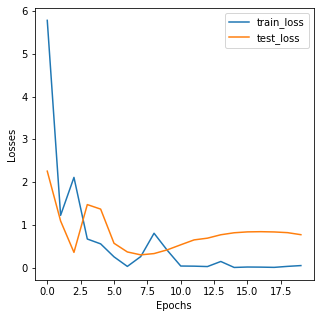

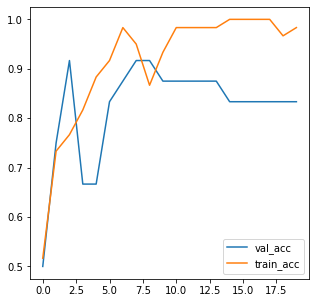

In [33]:
#History keeps track of loss and accuracy from train and test
#Extracted the value from those and plotted the result for loss and accuracy as shown below

history.history.keys()
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(5,5))
plt.plot(range(epochs),train_loss,label='train_loss')
plt.plot(range(epochs),test_loss,label='test_loss')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()


fig,ax = plt.subplots(figsize=(5,5))
ax.plot(range(epochs),history.history['val_accuracy'],label='val_acc')
ax.plot(range(epochs),history.history['accuracy'],label='train_acc')
ax.legend()


In [34]:
#Final Test accuracy is given by evaluate function 

score = model.evaluate(x_test,y_test)
print('Test accuracy is ',score[1])

24/24 [==============================] - 0s 386us/step
Test accuracy is  0.8333333134651184
